# EDA: Fashion E-commerce Analytics

Portfolio Project: Data Analyst focus (Product & Merchandising Insights)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data_dir = '../data/'
customers = pd.read_csv(f'{data_dir}customers.csv')
products = pd.read_csv(f'{data_dir}products.csv')
orders = pd.read_csv(f'{data_dir}orders.csv')
order_items = pd.read_csv(f'{data_dir}order_items.csv')
marketing = pd.read_csv(f'{data_dir}marketing_spend.csv')
traffic = pd.read_csv(f'{data_dir}traffic_sessions_sample.csv')

# Preview
display(customers.head())
display(products.head())
display(orders.head())
display(order_items.head())

,customer_id,first_name,last_name,email,country,currency,created_at
0,1,Elijah,Hernandez,user1@example.com,AU,AUD,2025-09-12
1,2,Benjamin,Thomas,user2@example.com,US,USD,2024-06-25
2,3,Liam,Moore,user3@example.com,US,USD,2023-10-07
3,4,Mia,Martin,user4@example.com,FR,EUR,2024-06-28
4,5,Henry,Martin,user5@example.com,US,USD,2024-07-13


,product_id,sku,product_name,brand,category,price_usd
0,1,SKU000001,Prod 1,BrandF,Accessories,27.06
1,2,SKU000002,Prod 2,BrandK,Bottoms,18.49
2,3,SKU000003,Prod 3,BrandC,Outerwear,29.62
3,4,SKU000004,Prod 4,BrandH,Dresses,50.09
4,5,SKU000005,Prod 5,BrandC,Shoes,17.45


,order_id,customer_id,order_date,country,currency,total_usd,items_count,total_local
0,1,5152,2023-01-28,FR,EUR,121.67,5,112.66
1,2,24215,2024-06-03,MX,MXN,27.83,3,506.00
2,3,129634,2024-12-15,FR,EUR,76.90,5,71.20
3,4,114186,2024-01-05,MX,MXN,56.34,2,1024.36
4,5,64436,2023-01-13,AU,AUD,211.45,7,320.38


,order_id,product_id,quantity,price_usd,order_date,country,currency,line_total_usd
0,273628,1066,2,10.26,2024-06-02,FR,EUR,20.52
1,16418,1353,1,26.41,2023-03-11,US,USD,26.41
2,296798,1673,1,15.88,2024-01-13,FR,EUR,15.88
3,286503,1044,2,19.63,2024-02-03,MX,MXN,39.26
4,200934,1981,1,10.09,2025-10-13,US,USD,10.09


## 1. GMV / Revenue Analysis

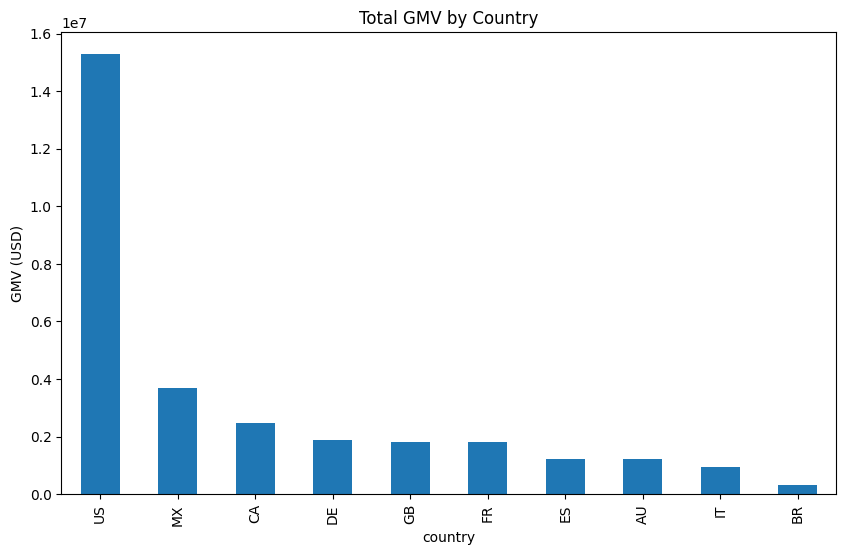

In [3]:
gmv_by_country = orders.groupby('country')['total_usd'].sum().sort_values(ascending=False)
gmv_by_country.plot(kind='bar', figsize=(10,6), title='Total GMV by Country')
plt.ylabel('GMV (USD)')
plt.show()

## 2. Product Performance

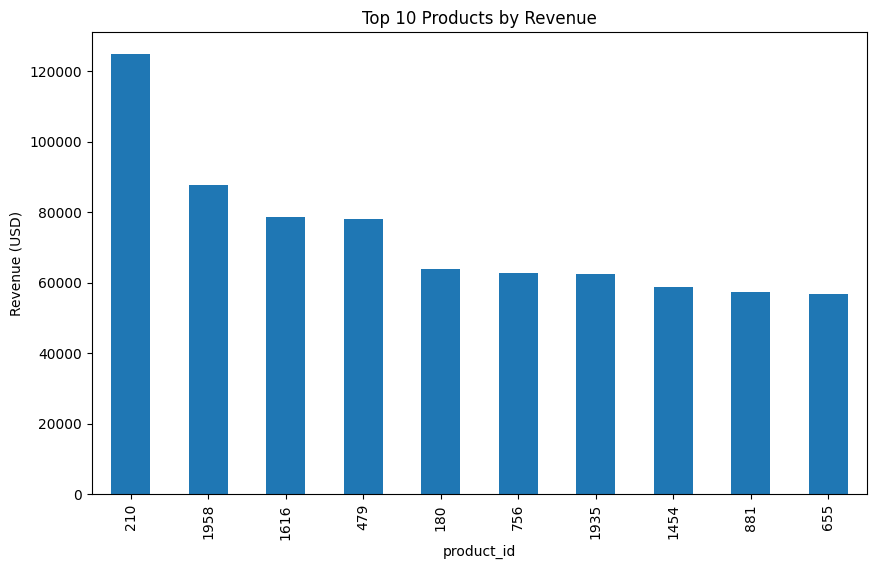

In [4]:
top_products = order_items.groupby('product_id')['line_total_usd'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', figsize=(10,6), title='Top 10 Products by Revenue')
plt.ylabel('Revenue (USD)')
plt.show()

## 3. Category Analysis

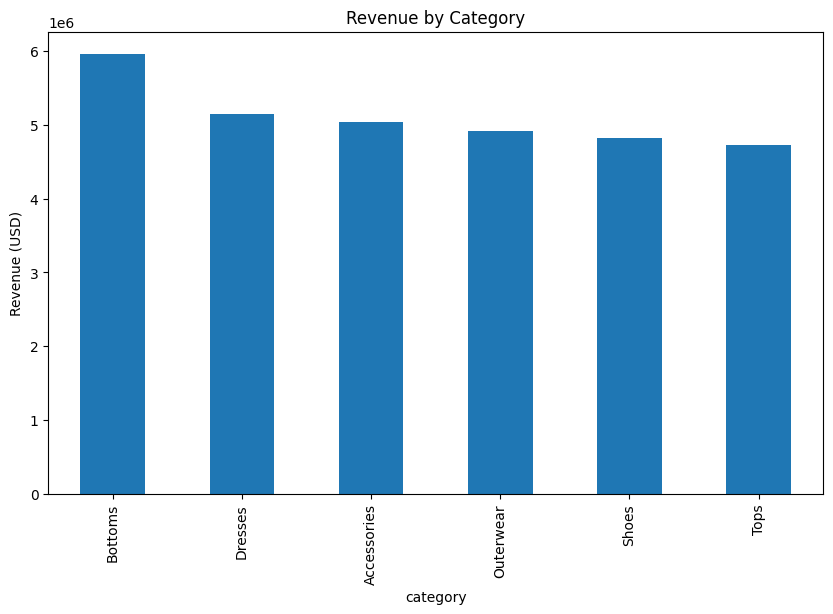

In [5]:
order_items = order_items.merge(products[['product_id','category']], on='product_id', how='left')
category_gmv = order_items.groupby('category')['line_total_usd'].sum().sort_values(ascending=False)
category_gmv.plot(kind='bar', figsize=(10,6), title='Revenue by Category')
plt.ylabel('Revenue (USD)')
plt.show()

## 4. Inventory / Quantity Analysis

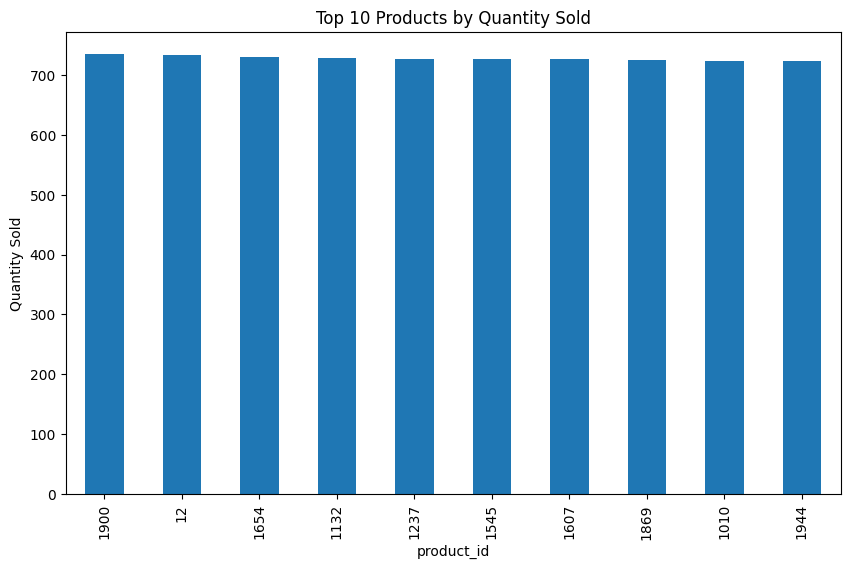

In [6]:
inventory = order_items.groupby('product_id')['quantity'].sum().sort_values(ascending=False).head(10)
inventory.plot(kind='bar', figsize=(10,6), title='Top 10 Products by Quantity Sold')
plt.ylabel('Quantity Sold')
plt.show()

## 5. Marketing Channel Analysis

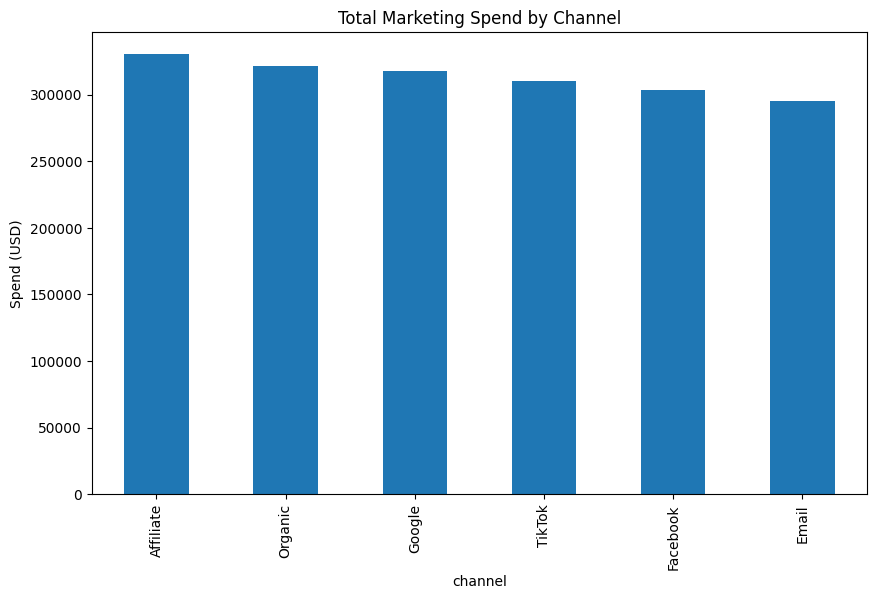

In [7]:
marketing_grouped = marketing.groupby('channel')['spend_usd'].sum().sort_values(ascending=False)
marketing_grouped.plot(kind='bar', figsize=(10,6), title='Total Marketing Spend by Channel')
plt.ylabel('Spend (USD)')
plt.show()

## 6. Optional: Export Plots & Summary to HTML

In [8]:
# export notebook as HTML for GitHub Pages
!jupyter nbconvert --to html 01_EDA.ipynb --output ../01_EDA.html

[NbConvertApp] Converting notebook 01_EDA.ipynb to html
[NbConvertApp] Writing 290419 bytes to ../01_EDA.html
